In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [3]:
mushroom_data = pd.read_csv("mushroom_data.csv")

In [4]:
mushroom_data.head(10)

,class,cap-diameter,stem-width,stem-height,weight
0,poisonous,12.08,16.07,11.13,107
1,edible,5.11,10.49,6.35,184
2,poisonous,4.61,12.25,7.08,97
3,poisonous,3.38,2.74,3.83,19
4,edible,1.35,2.30,4.84,111
5,poisonous,8.01,11.56,11.51,76
6,edible,3.62,3.52,5.70,193
7,edible,4.15,3.53,5.87,25
8,edible,1.61,1.92,5.02,107
9,poisonous,1.25,5.16,3.09,126


In [5]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35653 entries, 0 to 35652
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   class         35653 non-null  object 
 1   cap-diameter  35653 non-null  float64
 2   stem-width    35653 non-null  float64
 3   stem-height   35653 non-null  float64
 4   weight        35653 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.4+ MB


# Visualization

<Axes: xlabel='cap-diameter', ylabel='stem-height'>

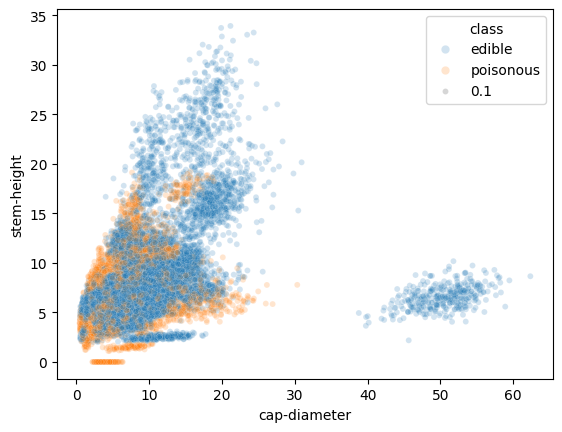

In [6]:
shuffled_data = mushroom_data.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle for better visibility

sns.scatterplot(shuffled_data, x="cap-diameter", y="stem-height", hue="class", alpha=0.2, size=0.1)

<Axes: xlabel='class', ylabel='Count'>

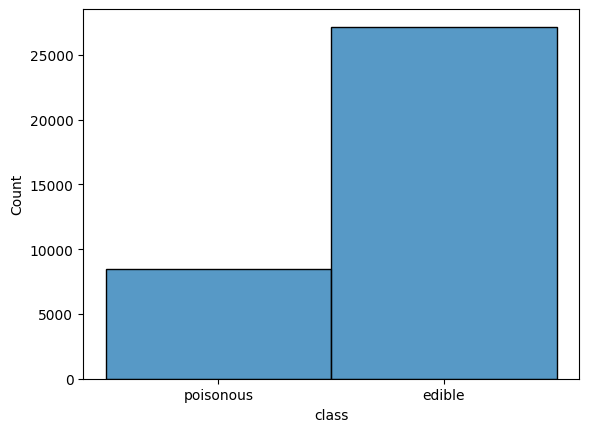

In [7]:
sns.histplot(mushroom_data, x="class")

# Prepare data for model training

## Split data into features (X) and labels (y)

In [15]:
X = mushroom_data[["cap-diameter", "stem-width", "stem-height", "weight"]]
y = mushroom_data["class"]

In [16]:
X.head(10)

,cap-diameter,stem-width,stem-height,weight
0,12.08,16.07,11.13,107
1,5.11,10.49,6.35,184
2,4.61,12.25,7.08,97
3,3.38,2.74,3.83,19
4,1.35,2.30,4.84,111
5,8.01,11.56,11.51,76
6,3.62,3.52,5.70,193
7,4.15,3.53,5.87,25
8,1.61,1.92,5.02,107
9,1.25,5.16,3.09,126


In [17]:
y.head(10)

0    poisonous
1       edible
2    poisonous
3    poisonous
4       edible
5    poisonous
6       edible
7       edible
8       edible
9    poisonous
Name: class, dtype: object

# Train simple KNeighborsClassifier

Visualization: <https://tysek64.github.io/explorer.html>

In [18]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors_classifier = KNeighborsClassifier(n_neighbors=5)

In [19]:
k_neighbors_classifier.fit(X, y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Test on new mushroom

In [5]:
new_mushrooms = [
    [15, 20, 18, 92]
]

In [6]:
k_neighbors_classifier.predict(new_mushrooms)

NameError: name 'k_neighbors_classifier' is not defined

.

.

.

.

.

.

Spoiler blocker :)

.

.

.

.

.

# Split dataset into **train set** and **test set**

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Verify number of samples in each set

In [7]:
X.shape

NameError: name 'X' is not defined

In [24]:
X_train.shape

(28522, 4)

In [25]:
X_test.shape

(7131, 4)

## Train model on new set

In [26]:
k_neighbors_classifier.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Check if the output looks allright

In [27]:
k_neighbors_classifier.predict(X_test)[:10]

array(['edible', 'edible', 'edible', 'edible', 'edible', 'edible',
       'poisonous', 'edible', 'edible', 'edible'], dtype=object)

In [28]:
y_test[:10].to_numpy()

array(['edible', 'poisonous', 'poisonous', 'poisonous', 'edible',
       'edible', 'poisonous', 'edible', 'edible', 'edible'], dtype=object)

## Count the amount of correct samples

In [29]:
model_predictions = k_neighbors_classifier.predict(X_test)

In [30]:
y_test == model_predictions

17311     True
4518     False
7294     False
8274     False
31383     True
         ...  
10137    False
2467     False
3949     False
11456    False
22602     True
Name: class, Length: 7131, dtype: bool

In [31]:
np.sum(y_test == model_predictions)

np.int64(5647)

In [32]:
np.sum(y_test == model_predictions) / len(y_test)

np.float64(0.7918945449446081)

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model_predictions)

0.7918945449446081

## Is this a good result?

.

.

.

.

.

.

<Axes: xlabel='class', ylabel='Count'>

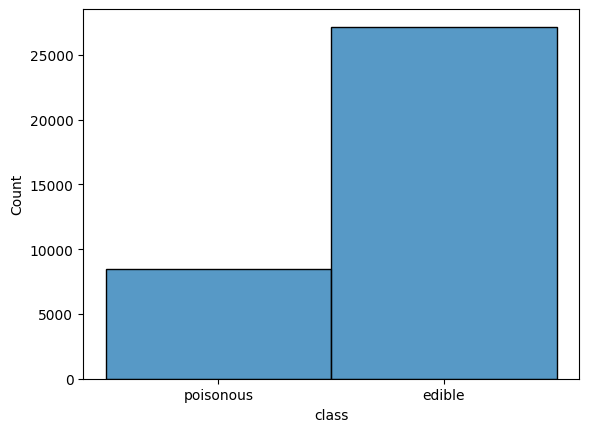

In [34]:
sns.histplot(mushroom_data, x="class")

In [35]:
np.sum(y_test == "edible") / len(y_test)

np.float64(0.7603421679988781)

## **We can get similair results by just always guessing "edible"!!!**

.

.

.

.

.

.

.

.

.

.

# Confusion matrix

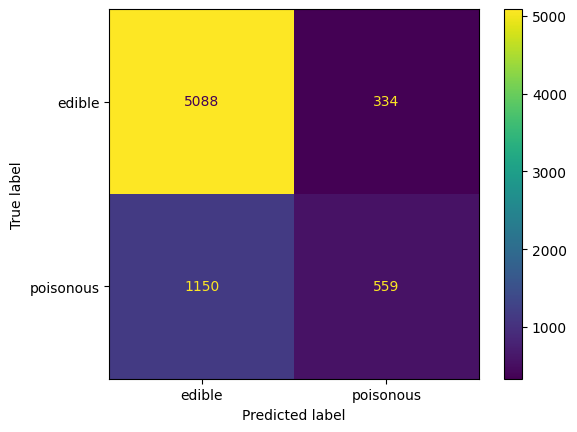

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, model_predictions)

## Recall

In [37]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall_score(y_test, model_predictions, pos_label="poisonous")

0.3270918665886483

## Precision

In [38]:
precision_score(y_test, model_predictions, pos_label="poisonous")

0.6259798432250839

## F1

In [39]:
f1_score(y_test, model_predictions, pos_label="poisonous")

0.4296694850115296

# Precision/recall relation

## Use model to predict probabilities instead of classes

In [40]:
model_probabilities_both_classes = k_neighbors_classifier.predict_proba(X_test)

model_probabilities_both_classes

array([[0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ]], shape=(7131, 2))

## Only take into account probability of mushroom being poisonous

In [41]:
k_neighbors_classifier.classes_

array(['edible', 'poisonous'], dtype=object)

In [42]:
model_probabilities = model_probabilities_both_classes[:, 1]

In [43]:
model_probabilities

array([0.4, 0.4, 0. , ..., 0. , 0.4, 0. ], shape=(7131,))

## Default threshold = 0.5

This is the default behavior of the model

In [44]:
(model_probabilities >= 0.5)[:10]

array([False, False, False, False, False, False,  True, False, False,
       False])

In [45]:
(model_predictions == "poisonous")[:10]

array([False, False, False, False, False, False,  True, False, False,
       False])

## Safer model (threshold < 0.5)

In [46]:
(model_probabilities >= 0.4)[:10]

array([ True,  True, False, False, False, False,  True,  True,  True,
       False])

In [47]:
model_safe_predictions = np.where(model_probabilities >= 0.2, "poisonous", "edible")

## Safer model metrics

In [48]:
accuracy_score(y_test, model_safe_predictions)

0.5802832702285794

In [49]:
recall_score(y_test, model_safe_predictions, pos_label="poisonous")

0.8133411351667642

In [50]:
precision_score(y_test, model_safe_predictions, pos_label="poisonous")

0.3420275590551181

## Visualization

In [51]:
from sklearn.metrics import precision_recall_curve
knn_precisions, knn_recalls, knn_thresholds = precision_recall_curve(y_test, model_probabilities, pos_label="poisonous")

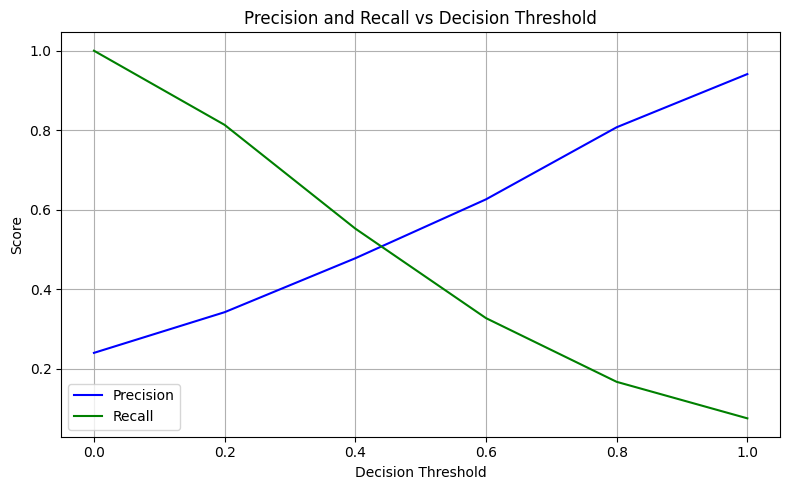

In [52]:
plt.figure(figsize=(8, 5))
plt.plot(knn_thresholds, knn_precisions[:-1], label="Precision", color="blue")
plt.plot(knn_thresholds, knn_recalls[:-1], label="Recall", color="green")

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Decision Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

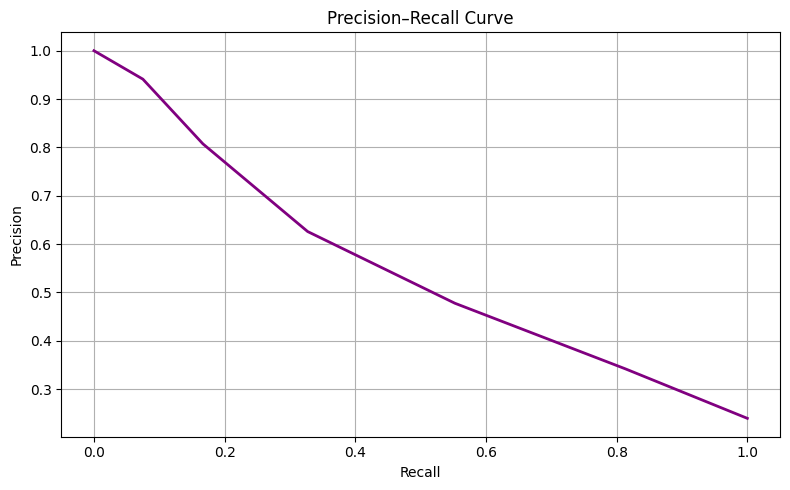

In [53]:
plt.figure(figsize=(8, 5))
plt.plot(knn_recalls, knn_precisions, color="purple", lw=2)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

# New model: Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
random_forest_predictions = random_forest_classifier.predict(X_test)

## Random Forest metrics

In [56]:
print("Accuracy:", accuracy_score(y_test, random_forest_predictions))
print("Recall:", recall_score(y_test, random_forest_predictions, pos_label="poisonous"))
print("Precision:", precision_score(y_test, random_forest_predictions, pos_label="poisonous"))
print("F1:", f1_score(y_test, random_forest_predictions, pos_label="poisonous"))

Accuracy: 0.863132800448745
Recall: 0.5623171445289643
Precision: 0.808242220353238
F1: 0.663216011042098


## Comparison of precision-recall curves

In [57]:
random_forest_probabilities = random_forest_classifier.predict_proba(X_test)[:, 1]

rf_precisions, rf_recalls, rf_thresholds = precision_recall_curve(y_test, random_forest_probabilities, pos_label="poisonous")

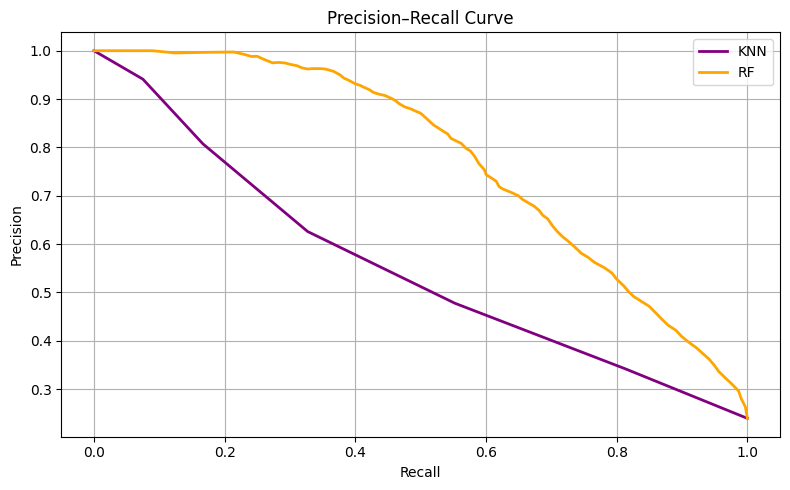

In [58]:
plt.figure(figsize=(8, 5))
plt.plot(knn_recalls, knn_precisions, color="purple", lw=2, label="KNN")
plt.plot(rf_recalls, rf_precisions, color="orange", lw=2, label="RF")
plt.plot()

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()